In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

## 1. Business/Project Understanding

Explain project's background and requirement.

***Objective:***

Untuk mengkategorikan negara menggunakan faktor sosial ekonomi dan kesehatan yang menentukan pembangunan negara secara keseluruhan.


***Tentang Organisasi:***

HELP International adalah LSM kemanusiaan internasional yang berkomitmen untuk memerangi kemiskinan dan menyediakan fasilitas dan bantuan dasar bagi masyarakat di negara-negara terbelakang saat terjadi bencana dan bencana alam.

 

***Permasalahan:***

HELP International telah berhasil mengumpulkan sekitar $ 10 juta. Saat ini, CEO LSM perlu memutuskan bagaimana menggunakan uang ini secara strategis dan efektif. Jadi, CEO harus mengambil keputusan untuk memilih negara yang paling membutuhkan bantuan. Oleh karena itu, Tugas teman-teman  adalah mengkategorikan negara menggunakan beberapa faktor sosial ekonomi dan kesehatan yang menentukan perkembangan negara secara keseluruhan. Kemudian kalian perlu menyarankan negara mana saja  yang paling perlu menjadi fokus CEO.

 

***Penjelasan kolom fitur:***

- Negara : Nama negara

- Kematian_anak: Kematian anak di bawah usia 5 tahun per 1000 kelahiran

- Ekspor : Ekspor barang dan jasa perkapita

- Kesehatan: Total pengeluaran kesehatan perkapita

- Impor: Impor barang dan jasa perkapita

- Pendapatan: Penghasilan bersih perorang

- Inflasi: Pengukuran tingkat pertumbuhan tahunan dari Total GDP 

- Harapan_hidup: Jumlah tahun rata-rata seorang anak yang baru lahir akan hidup jika pola kematian saat ini tetap sama

- Jumlah_fertiliti: Jumlah anak yang akan lahir dari setiap wanita jika tingkat kesuburan usia saat ini tetap sama

- GDPperkapita: GDP per kapita. Dihitung sebagai Total GDP dibagi dengan total populasi. 


In [2]:

df = pd.read_csv('Data_Negara_HELP.csv')
df.head()

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


`Dataframe memiliki 167 Rows dan 10 Columns`

In [4]:
df.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## Multivariate Analysis with Heatmap

<AxesSubplot:>

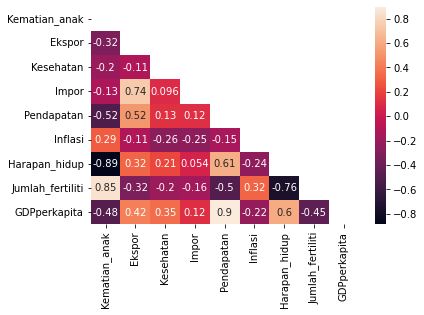

In [5]:
sns.heatmap(df.corr(), mask=np.triu(np.ones_like(df.corr())), annot=True)

In [6]:
sns.pairplot(df, corner=True);

`Berdasarkan heatmap, kami memutuskan mengevaluasi kolom 'Kematian_anak' dan 'Pendapatan' dikarenakan memiliki korelasi negatif yang cukup tinggi dan juga kedua kolom tersebut relevan dengan tujuan yaitu menentukan Negara mana yang perlu menerima bantuan berdasarkan tingkat Ekonomi dan Kesehatan`

In [7]:
df_new = df[['Negara','Kematian_anak', 'Pendapatan']]

df_new

,Negara,Kematian_anak,Pendapatan
0,Afghanistan,90.2,1610
1,Albania,16.6,9930
2,Algeria,27.3,12900
3,Angola,119.0,5900
4,Antigua and Barbuda,10.3,19100
...,...,...,...
162,Vanuatu,29.2,2950
163,Venezuela,17.1,16500
164,Vietnam,23.3,4490
165,Yemen,56.3,4480


## Data Cleaning

### 1. Missing Value

- Check if exist.
- Handle if exist.
- Recheck after handling (see the handling result).
- Elaborate how exactly you handle them.
- Elaborate why do you handle them in such way.

In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Negara         167 non-null    object 
 1   Kematian_anak  167 non-null    float64
 2   Pendapatan     167 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


`Tidak ditemukan missing value pada dataframe`

### 2. Outliers
- Check if exist (Even better if graphical representation is used).
- Handle if exist.
- Recheck after handling (see the handling result).
- Elaborate how exactly you handle them.
- Elaborate why do you handle them in such way.

`
Pada kasus ini kami tidak melakukan penghapusan pada data yang merupakan outliers, namun kami mengganti value yang merupakan outliers dengan mean dari data tersebut.
`

In [9]:
df_new.describe()

,Kematian_anak,Pendapatan
count,167.000000,167.000000
mean,38.270060,17144.688623
std,40.328931,19278.067698
min,2.600000,609.000000
25%,8.250000,3355.000000
50%,19.300000,9960.000000
75%,62.100000,22800.000000
max,208.000000,125000.000000


In [10]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return lower_limit, upper_limit

In [11]:
Lb_feat1, Ub_feat1 = outliers(df_new, 'Kematian_anak')
print(Lb_feat1)
print(Ub_feat1)

-72.525
142.875


In [12]:
Lb_feat2, Ub_feat2 = outliers(df_new, 'Pendapatan')
print(Lb_feat2)
print(Ub_feat2)

-25812.5
51967.5


In [13]:
df_new.describe()

,Kematian_anak,Pendapatan
count,167.000000,167.000000
mean,38.270060,17144.688623
std,40.328931,19278.067698
min,2.600000,609.000000
25%,8.250000,3355.000000
50%,19.300000,9960.000000
75%,62.100000,22800.000000
max,208.000000,125000.000000


<AxesSubplot:xlabel='Kematian_anak'>

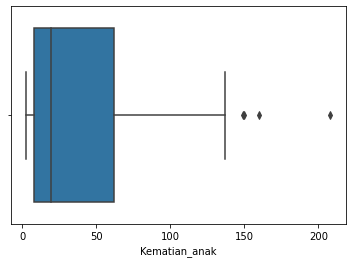

In [14]:
sns.boxplot(x=df_new["Kematian_anak"])


<AxesSubplot:xlabel='Pendapatan'>

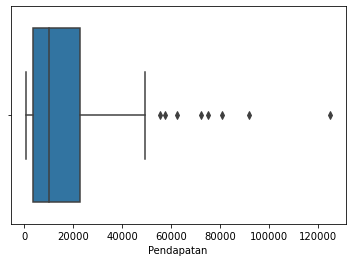

In [15]:
sns.boxplot(x=df_new["Pendapatan"])

In [16]:
for i in range(2):    
    Q1 = df_new["Kematian_anak"].quantile(0.25)
    Q3 = df_new["Kematian_anak"].quantile(0.75)

    IQR = Q3 - Q1
    cutoff = Q1 + 1.5 * IQR

    df_new["Kematian_anak_Outlier"] = False

    for index, row in df_new.iterrows():
        if row["Kematian_anak"] > cutoff:
            df_new.at[index, 'Kematian_anak_Outlier'] = True



    mean = df_new.groupby("Kematian_anak_Outlier")["Kematian_anak"].mean()
    mean[0]


    for index, row in df_new.iterrows():
        if row["Kematian_anak_Outlier"] == True:
            df_new.at[index, 'Kematian_anak'] = mean[0]
            df_new.at[index, 'Kematian_anak_Outlier'] = False

/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/2186788753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Kematian_anak_Outlier"] = False
/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/2186788753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Kematian_anak_Outlier"] = False


<AxesSubplot:xlabel='Kematian_anak'>

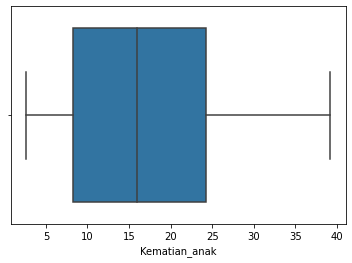

In [17]:
sns.boxplot(x=df_new["Kematian_anak"])


In [18]:

for i in range(2):
    Q1 = df_new["Pendapatan"].quantile(0.25)
    Q3 = df_new["Pendapatan"].quantile(0.75)

    IQR = Q3 - Q1
    cutoff = Q1 + 1.5 * IQR

    df_new["Pendapatan_Outlier"] = False

    for index, row in df_new.iterrows():
        if row["Pendapatan"] > cutoff:
            df_new.at[index, 'Pendapatan_Outlier'] = True



    mean = df_new.groupby("Pendapatan_Outlier")["Pendapatan"].mean()
    mean[0]


    for index, row in df_new.iterrows():
        if row["Pendapatan_Outlier"] == True:
            df_new.at[index, 'Pendapatan'] = mean[0]
            df_new.at[index, 'Pendapatan_Outlier'] = False

/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/1583765426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Pendapatan_Outlier"] = False
/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/1583765426.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new.at[index, 'Pendapatan'] = mean[0]
/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/1583765426.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

<AxesSubplot:xlabel='Pendapatan'>

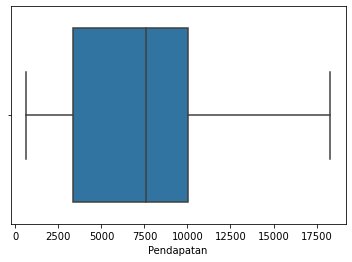

In [19]:
sns.boxplot(x=df_new["Pendapatan"])


In [20]:
df_new.describe()

,Kematian_anak,Pendapatan
count,167.000000,167.000000
mean,15.903645,7576.042414
std,8.743784,4464.457058
min,2.600000,609.000000
25%,8.250000,3355.000000
50%,15.903645,7576.042414
75%,24.285915,10041.760870
max,39.200000,18300.000000


In [21]:
df_new

,Negara,Kematian_anak,Pendapatan,Kematian_anak_Outlier,Pendapatan_Outlier
0,Afghanistan,24.471831,1610.000000,False,False
1,Albania,16.600000,9930.000000,False,False
2,Algeria,27.300000,12900.000000,False,False
3,Angola,24.471831,5900.000000,False,False
4,Antigua and Barbuda,10.300000,7576.042414,False,False
...,...,...,...,...,...
162,Vanuatu,29.200000,2950.000000,False,False
163,Venezuela,17.100000,16500.000000,False,False
164,Vietnam,23.300000,4490.000000,False,False
165,Yemen,15.903645,4480.000000,False,False


## Univariate Analysis with Histogram

Histogram


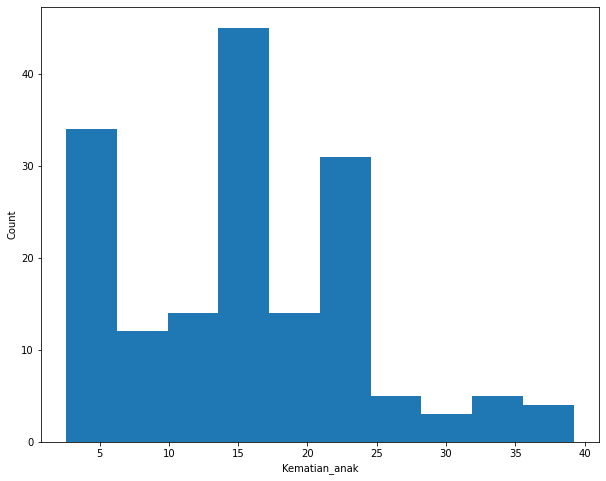

In [22]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)
print('Histogram')
plt.hist(df_new['Kematian_anak'])
plt.xlabel('Kematian_anak')
plt.ylabel('Count')
plt.show()

`Didapatkan frekuensi Kematian_anak dari masing-masing value`

Histogram


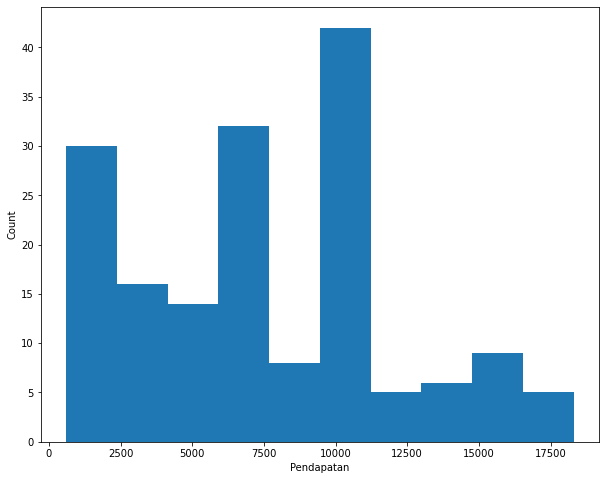

In [23]:
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 8)
print('Histogram')
plt.hist(df_new['Pendapatan'])
plt.xlabel('Pendapatan')
plt.ylabel('Count')
plt.show()

`Didapatkan frekuensi Pendapatan dari masing-masing value`

## Bivariate Analysis with Scatter Plot

Text(0.5, 0, 'Kematian_anak')

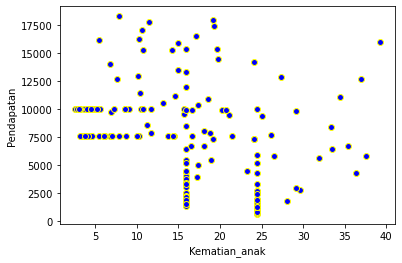

In [24]:
plt.scatter(df_new['Kematian_anak'], df_new['Pendapatan'], c='blue', label ='Cluster 1', edgecolors='yellow')
plt.ylabel("Pendapatan")
plt.xlabel("Kematian_anak")

`Didapatkan keterkaitan Pendapatan dan Kematian_anak dari masing-masing value`

## Clustering

### 1. Scalling Data with MinMaxScaller

In [25]:
# Rescaling data dengan MinMaxScaler

scaler = MinMaxScaler()

df_new[['Kematian_anak', 'Pendapatan']] = scaler.fit_transform(df_new[['Kematian_anak', 'Pendapatan']])

df_new.describe()

/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/530802698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[['Kematian_anak', 'Pendapatan']] = scaler.fit_transform(df_new[['Kematian_anak', 'Pendapatan']])


,Kematian_anak,Pendapatan
count,167.000000,167.000000
mean,0.363488,0.393818
std,0.238901,0.252358
min,0.000000,0.000000
25%,0.154372,0.155220
50%,0.363488,0.393818
75%,0.592511,0.533195
max,1.000000,1.000000


In [26]:
df_new_ready = df_new[['Kematian_anak', 'Pendapatan']]

In [27]:
X = df_new_ready.values


### 2. Decide the number of clusters : Elbow Method

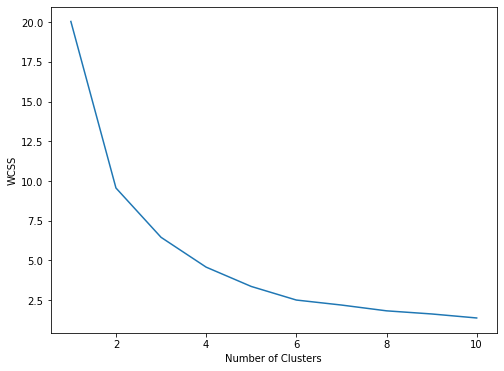

In [28]:
sse = []
k_list = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k).fit(X)
    centroids = kmeans.cluster_centers_
    prediksi = kmeans.predict(X)
    nilai_sse = 0
    
    for i in range(len(X)):
        titik_pusat = centroids[prediksi[i]]
        nilai_sse += (X[i, 0] - titik_pusat[0]) ** 2 + (X[i, 1] - titik_pusat[1]) ** 2
    
    sse.append(nilai_sse)
    k_list.append(k)


plt.figure(figsize=(8,6))
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.plot(k_list, sse)
plt.show()

### 3. Clustering with K = 3

In [29]:


df_new_ready.shape

kmeans = KMeans(n_clusters=3)

label = kmeans.fit_predict(df_new_ready)

print(label)

[1 2 2 1 0 0 1 0 0 2 0 0 1 2 0 0 1 1 1 1 0 2 2 0 2 1 1 1 1 0 1 1 1 0 2 2 1
 1 1 0 1 0 0 0 0 2 2 2 1 2 1 0 1 0 0 2 1 1 0 1 0 2 1 1 1 1 1 0 0 1 1 2 2 0
 0 0 1 0 2 1 1 1 0 1 1 2 2 1 1 1 0 0 0 1 1 0 0 1 0 1 2 1 1 1 0 1 1 1 0 1 0
 0 1 1 0 0 1 2 1 2 1 0 0 0 2 0 1 1 2 1 0 0 1 0 0 0 1 2 0 0 0 2 1 2 0 0 1 1
 2 1 1 1 2 2 2 1 0 0 0 0 2 1 1 2 1 1 1]


In [30]:
X

array([[0.59759101, 0.05658244],
       [0.38251366, 0.52687807],
       [0.67486339, 0.69476005],
       [0.59759101, 0.29907863],
       [0.21038251, 0.39381846],
       [0.32513661, 0.39381846],
       [0.42349727, 0.34429936],
       [0.06010929, 0.53319546],
       [0.04644809, 0.53319546],
       [1.        , 0.86999039],
       [0.30601093, 0.39381846],
       [0.16393443, 0.53319546],
       [0.36348758, 0.10349895],
       [0.31693989, 0.83042225],
       [0.07923497, 0.88129557],
       [0.05191257, 0.53319546],
       [0.44262295, 0.41099994],
       [0.59759101, 0.06845289],
       [0.36348758, 0.3284721 ],
       [0.36348758, 0.27138093],
       [0.11748634, 0.51500763],
       [0.36348758, 0.71737041],
       [0.46994536, 0.78520151],
       [0.21584699, 0.53319546],
       [0.22404372, 0.83042225],
       [0.59759101, 0.04640778],
       [0.59759101, 0.00876152],
       [0.36348758, 0.10802103],
       [0.59759101, 0.11593466],
       [0.08196721, 0.53319546],
       [0.

### 4. Visualize clustering

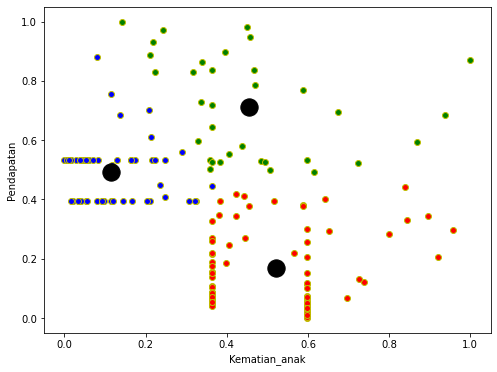

In [31]:

plt.figure(figsize=(8,6))
plt.xlabel('Kematian_anak')
plt.ylabel('Pendapatan')

plt.scatter(X[label==0, 0], X[label==0, 1], c='blue', label ='Cluster 0', edgecolors='y')
plt.scatter(X[label==1, 0], X[label==1, 1], c='red', label ='Cluster 1',edgecolors='y')
plt.scatter(X[label==2, 0], X[label==2, 1], c='green', label ='Cluster 2',edgecolors='y')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', label = 'Centroids')

In [32]:
df_new_ready

,Kematian_anak,Pendapatan
0,0.597591,0.056582
1,0.382514,0.526878
2,0.674863,0.694760
3,0.597591,0.299079
4,0.210383,0.393818
...,...,...
162,0.726776,0.132327
163,0.396175,0.898253
164,0.565574,0.219377
165,0.363488,0.218812


In [33]:
df_new

,Negara,Kematian_anak,Pendapatan,Kematian_anak_Outlier,Pendapatan_Outlier
0,Afghanistan,0.597591,0.056582,False,False
1,Albania,0.382514,0.526878,False,False
2,Algeria,0.674863,0.694760,False,False
3,Angola,0.597591,0.299079,False,False
4,Antigua and Barbuda,0.210383,0.393818,False,False
...,...,...,...,...,...
162,Vanuatu,0.726776,0.132327,False,False
163,Venezuela,0.396175,0.898253,False,False
164,Vietnam,0.565574,0.219377,False,False
165,Yemen,0.363488,0.218812,False,False


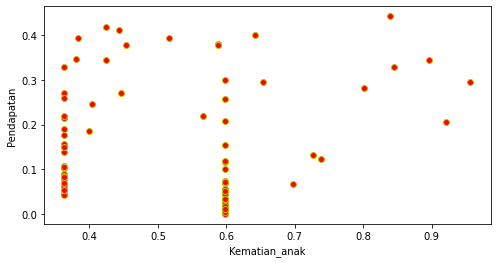

In [34]:
plt.figure(figsize=(8,4))
plt.xlabel('Kematian_anak')
plt.ylabel('Pendapatan')

plt.scatter(X[label==1, 0], X[label==1, 1], c='red', label ='Cluster 1',edgecolors='y')

In [35]:
df_new["Cluster"] = label

/var/folders/br/dnqls7751tdb97g6z28kqgxw0000gn/T/ipykernel_94418/3554158139.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new["Cluster"] = label


In [36]:
df_new

,Negara,Kematian_anak,Pendapatan,Kematian_anak_Outlier,Pendapatan_Outlier,Cluster
0,Afghanistan,0.597591,0.056582,False,False,1
1,Albania,0.382514,0.526878,False,False,2
2,Algeria,0.674863,0.694760,False,False,2
3,Angola,0.597591,0.299079,False,False,1
4,Antigua and Barbuda,0.210383,0.393818,False,False,0
...,...,...,...,...,...,...
162,Vanuatu,0.726776,0.132327,False,False,1
163,Venezuela,0.396175,0.898253,False,False,2
164,Vietnam,0.565574,0.219377,False,False,1
165,Yemen,0.363488,0.218812,False,False,1


## Recomendation

In [37]:
cluster_1 = df_new["Cluster"] == 1

df_new[cluster_1]

,Negara,Kematian_anak,Pendapatan,Kematian_anak_Outlier,Pendapatan_Outlier,Cluster
0,Afghanistan,0.597591,0.056582,False,False,1
3,Angola,0.597591,0.299079,False,False,1
6,Armenia,0.423497,0.344299,False,False,1
12,Bangladesh,0.363488,0.103499,False,False,1
16,Belize,0.442623,0.411000,False,False,1
...,...,...,...,...,...,...
161,Uzbekistan,0.920765,0.205246,False,False,1
162,Vanuatu,0.726776,0.132327,False,False,1
164,Vietnam,0.565574,0.219377,False,False,1
165,Yemen,0.363488,0.218812,False,False,1


In [40]:

df_sorted = df_new[['Negara','Kematian_anak', 'Pendapatan']]
df_sorted = df_new[cluster_1].sort_values(['Kematian_anak', 'Pendapatan'], ascending = [False, True])
df_sorted.drop(['Kematian_anak_Outlier' ,'Pendapatan_Outlier'], axis=1, inplace=True)

### Rekomendasi berdasarkan tingkat `Kematian Anak` tinggi dan tingkat `Pendapatan` rendah

In [41]:

df_sorted.head()

,Negara,Kematian_anak,Pendapatan,Cluster
65,Guyana,0.956284,0.295687,1
161,Uzbekistan,0.920765,0.205246,1
62,Guatemala,0.896175,0.344865,1
105,Morocco,0.844262,0.329603,1
70,Indonesia,0.838798,0.442089,1
